# Classification task dengan Naive Bayes

## Bayes' Theorem

Bayes' theorem menawarkan suatu formula untuk menghitung nilai probability
dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi
terkait; atau sering kali dikenal dengan istilah conditional probability.

$P(A|B)=\frac{P(B|A)\times P(A)}{P(B)}$

$P(y|X)=\frac{P(X|y)\times P(Y)}{P(X)}$

$Posterior=\frac{Likehood\times Prior}{Evidence}$

## Pengenalan Naive Bayes Classification

### Studi Kasus 1

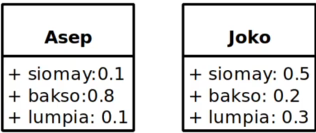

Misi : Lakukan Prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah lumpia dan bakso

### Prior Probality: $P(y)$

$P(Asep)=0.5$

$P(Joko)=0.5$

### Likehood: $P(X|y)$

* Asep:
$$
\begin{align}
P =(lumpia,bakso|Asep)=&(0.1 \times 0.8 )\\
=&0.08
\end{align}
$$

* joko:
$$\begin{align}
P =(lumpia,bakso|Asep)=&(0.3 \times 0.2 )\\
=&0.06
\end{align}
$$

### Evidence atau Normalizer: $P(X)$

$$\begin{align}
Evidence &=\sum (Likehood \times Prior)\\
P(lumpia,bakso)&=(0.08 \times 0.5)+(0.06 \times 0.5)\\
&=0.07
\end{align}
$$

### Posterior Probability: $P(y|X)$

* Formula:

$
\quad  Posterior = \frac{Likehood \times Prior}{Evidence}
$

* Asep:
  $$\begin{align}
  P(Asep|lumpia,bakso)&=\frac{0.08 \times 0.5}{0.07}\\
  &=0.57
  \end{align}
  $$

* Joko:
  $$\begin{align}
  P(Joko|lumpia,bakso)&=\frac{0.06 \times 0.5}{0.07}\\
  &=0.43
  \end{align}
  $$

### Studi kasus 2

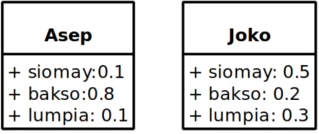

Misi : Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesananya adalah siomay dan bakso

### Posterior Probability: $P(y|X)$ (kasus 2)

* pesanan: siomay, bakso

* Evidence: $P(X)$
  $$
  \begin{align}
  P(siomay,bakso)&=(0.1 \times 0.8 \times 0.5)+(0.5 \times 0.2 \times 0.5)\\
  &=0.09
  \end{align}
  $$

* Asep
   $$
  \begin{align}
  P(Asep|siomay,bakso)&=\frac{(0.1 \times 0.8)\times0.5}{0.09}\\
  &=0.444
  \end{align}
  $$

* Joko
   $$
  \begin{align}
  P(Asep|siomay,bakso)&=\frac{(0.5 \times 0.2)\times0.5}{0.09}\\
  &=0.555
  \end{align}
  $$

## Mengapa disebut Naive?

* Karena sewaktu kita mendefinisikan Likelihood
$P(lumpia, bakso|Asep),$
* kita mengasumsikan $P(lumpia|Asep)$ conditionally independent
terhadap $P(bakso|Asep)$; demikian sebaliknya.
* Sehingga dapat diformulasikan sebagai berikut:

$P(lumpia, bakso|Asep) = P(lumpia|Asep) × P(bakso|Asep)$

## Dataset: Breast Cancer Wisconsin (Diagnostic)

### Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [2]:

# load_breast_cancer?
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

### Training & Testing Set

In [3]:
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.2,
random_state=0)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)


### Naive Bayes dengan Scikit Learn

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [5]:
model.score(X_test, y_test)

0.9298245614035088